In [54]:
#number of paths from 0
N = 5
l = [[] for e in range(N+1)]
D = [dict() for e in range(N+1)]

res = [ 0 for e in range(N+1)]
for n in range(1,N+1):
    num = 0
    for G in digraphs(n):
        num += 1
        if num%1000 == 0:
            print(num)
        if G.is_directed_acyclic():
            GG = G.transitive_reduction()
            #print(GG.show(),len(GG.all_simple_paths()))
            x = len(GG.all_simple_paths(starting_vertices=[0]))
            l[n].append(x)
            if x not in D[n]:
                D[n][x] = GG            
    res[n] = max(l[n])
print(res)

1000
2000
3000
4000
5000
6000
7000
8000
9000
[0, 0, 1, 2, 4, 6]


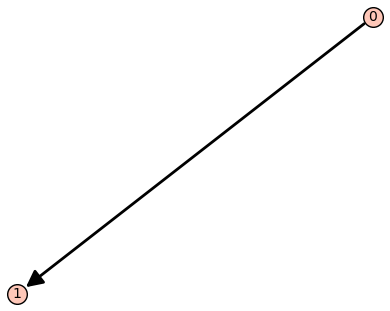

None


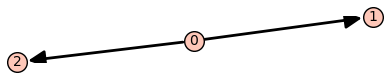

None


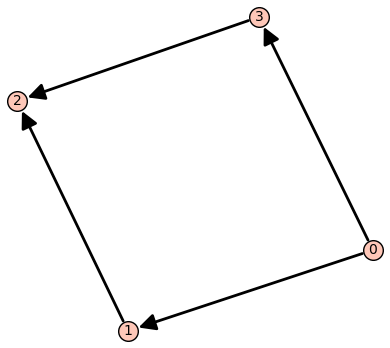

None


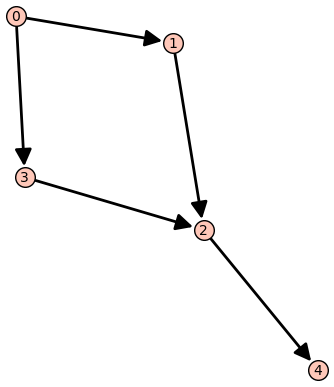

None


In [47]:
for n in range(2,N+1):
    print(D[n][res[n]].show())

In [60]:
#number of transitive reduction dags
N = 5
l = [[] for e in range(N+1)]
D = [[] for e in range(N+1)]

res = [ 0 for e in range(N+1)]
for n in range(1,N+1):
    num = 0
    for G in digraphs(n):
        num += 1
        if num%1000 == 0:
            print(num)
        if G.is_directed_acyclic():
            GG = G.transitive_reduction()
            mat = GG.incidence_matrix()
            tu = tuple(mat)
            if tu not in D[n]:
                D[n].append(tu)
            #print(GG.show(),len(GG.all_simple_paths()))
                 
    res[n] = len(D[n])
print(res)

1000
2000
3000
4000
5000
6000
7000
8000
9000
[0, 1, 2, 5, 19, 108]


In [61]:
D[3]

[((), (), ()),
 ((-1), (1), (0)),
 ((-1, -1), (1, 0), (0, 1)),
 ((-1, 0), (1, -1), (0, 1)),
 ((-1, 0), (1, 1), (0, -1))]

In [62]:
#number of transitive reduction graphs
N = 5
l = [[] for e in range(N+1)]
D = [[] for e in range(N+1)]

res = [ 0 for e in range(N+1)]
for n in range(1,N+1):
    num = 0
    for G in digraphs(n):
        num += 1
        if num%1000 == 0:
            print(num)
        GG = G.transitive_reduction()
        mat = GG.incidence_matrix()
        tu = tuple(mat)
        if tu not in D[n]:
            D[n].append(tu)
            #print(GG.show(),len(GG.all_simple_paths()))
                 
    res[n] = len(D[n])
print(res)

1000
2000
3000
4000
5000
6000
7000
8000
9000
[0, 1, 3, 12, 92, 1294]


In [67]:
for e in res:
    if e != 0:
        print(e,divisors(e))

1 [1]
3 [1, 3]
12 [1, 2, 3, 4, 6, 12]
92 [1, 2, 4, 23, 46, 92]
1294 [1, 2, 647, 1294]


In [161]:
def random_transitive_reduction_one_source(n,p):
    G = digraphs.RandomDirectedAcyclicGraph(n, p)
    G = G.transitive_reduction()
    l = G.sources()
    G.add_vertex(n+1)
    for e in l:
        G.add_edge(n+1,e)
    return G

In [162]:
def ps(G,u):
    return len(G.all_simple_paths(starting_vertices=[u]))
def puv(G,u,v):
    return len(G.all_simple_paths(starting_vertices=[u], ending_vertices=[v]))

In [163]:
def paths_from_s(G,v,w,sour):
    if v not in G:
        return -1
    elif v == sour and w not in G:
        return len(G.all_simple_paths(starting_vertices=[sour])) + 1
    elif v != sour and w not in G:
        return len(G.all_simple_paths(starting_vertices=[sour])) + puv(G,s,v)
    else: #v in G and w in G
        return len(G.all_simple_paths(starting_vertices=[sour])) 
    + puv(G,u,v) * (1 + len(G.all_simple_paths(starting_vertices=[w])))

In [142]:
GG = random_transitive_reduction_one_source(5,0.2)

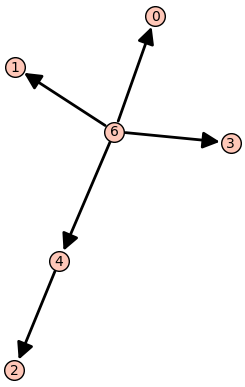

In [143]:
GG.show()

In [124]:
D = GG.copy()

In [125]:
D.add_edge(3,0)

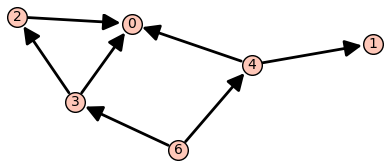

In [126]:
D.show()

In [138]:
paths_from_s(GG,0,3,6)

6

In [139]:
ps(D,6)

7

In [164]:
def essai_dag(n,p,nb):
    for i in range(nb):
        G = random_transitive_reduction_one_source(n,p)
        pp = ps(G,n+1)
        v = G.size()
        e = G.order()
        print("paths", pp, "ver", v,"edges",e,"v*e",v*e)
        if pp >= v * e:
            print("******************")
            return G
    return 1

In [202]:
x = essai_dag(40,0.5,1000)

paths 13154 ver 68 edges 41 v*e 2788
******************


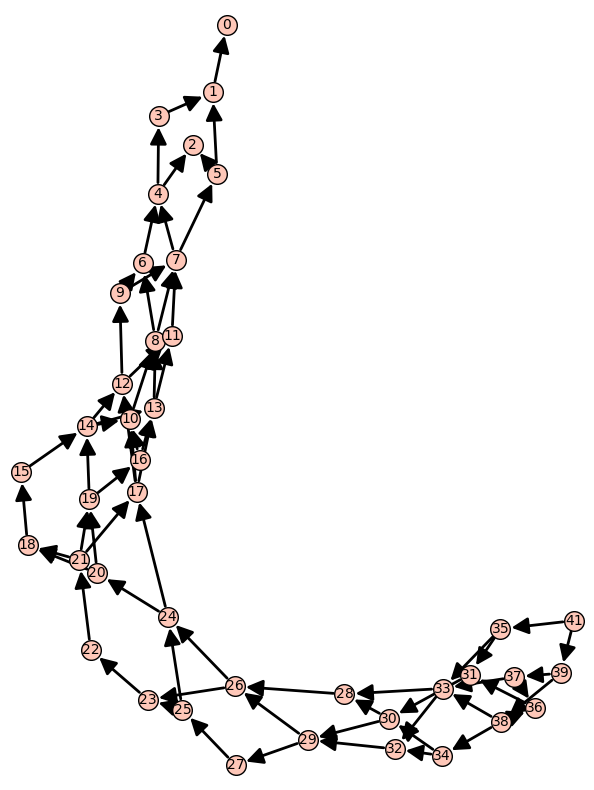

In [203]:
x.plot(figsize=(10,8))